Reshape data X_train :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

X_test :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

input image = : <KerasTensor shape=(None, 784), dtype=float32, sparse=False, name=keras_tensor_6>

Encoder = : <KerasTensor shape=(None, 64), dtype=float32, sparse=False, name=keras_tensor_7>

Decoder = : <KerasTensor shape=(None, 784), dtype=float32, sparse=False, name=keras_tensor_8>


autoencoder :  <Functional name=functional_3, built=True>

encoder :  <Functional name=functional_4, built=True>
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0962
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0296
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

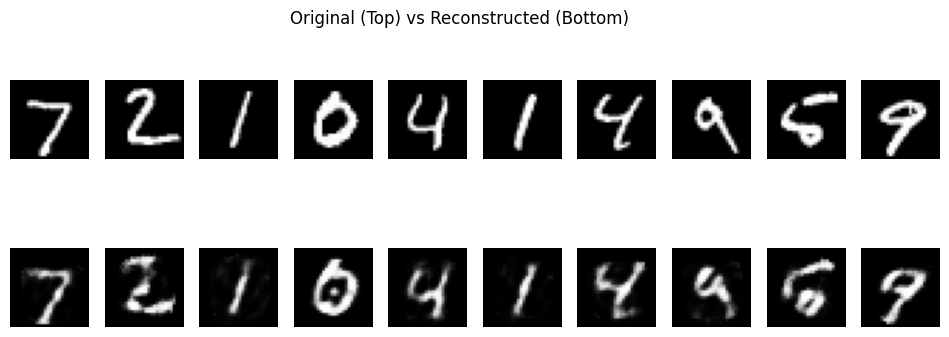

In [2]:
#  Autoencoder 
# by three step 
# 1) AutoEncoder
# 2) Encoder
# 3) Decoder 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np 
# load the data 
(X_train,_),(X_test,y_test) = mnist.load_data()
# Reshape the data
X_train = X_train.reshape(-1,784)/255.0
X_test = X_test.reshape(-1,784)/255.0
# print reshape data 
print("Reshape data X_train : ",X_train)
print()
print("X_test : ",X_test)

Input_imag = Input(shape=(784,))
Encoder = Dense(64,activation="relu")(Input_imag)
Decoder = Dense(784,activation="sigmoid")(Encoder)
print()
print("input image = :",Input_imag)
print()
print("Encoder = :",Encoder)
print()
print("Decoder = :",Decoder)
print()
autoencoder = Model(Input_imag,Decoder)
encoder = Model(Input_imag,Encoder)
print()
print("autoencoder : ",autoencoder)
print()
print("encoder : ",encoder)
#  compile the model 
autoencoder.compile(optimizer="adam",loss="mse")
#  train the model 
autoencoder.fit(X_train,X_train,epochs=5,batch_size=256)
# categorical data
y_test_cat = to_categorical(y_test)
# convertr numerical value 
print("y_test_categorical data : ",y_test_cat)

c_i = Input(shape=(784,))
features = encoder(c_i)
output1 = Dense(10,activation="softmax")(features)

print("categorical input :",c_i)
print("fetures : ",features)
print("output : ",output1)

classifier = Model(c_i,output1)
print("classifier model output : ",classifier)
# compile classifier model by loss and accuracy
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# fit the classifier model
classifier.fit(X_test,y_test_cat,epochs=5,batch_size=256)

re = autoencoder.predict(X_test[:5])
print(X_test[0][:10])
print(re[0][:10])

loss,acc = classifier.evaluate(X_test,y_test_cat,verbose=0)
print("loss : ",loss)
print("accuracy : ",acc)

# chack actual value and predict value 
pred = classifier.predict(X_test[:10])
print(np.argmax(pred,axis=1))
print(y_test[:10])

# Autoencoder Reconstruction Quality
reconstructed = autoencoder.predict(X_test[:10])

plt.figure(figsize=(12,4))
for i in range(10):
    # Original
    plt.subplot(2,10,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.axis("off")
    # Reconstructed
    plt.subplot(2,10,i+11)
    plt.imshow(reconstructed[i].reshape(28,28), cmap='gray')
    plt.axis("off")

plt.suptitle("Original (Top) vs Reconstructed (Bottom)")
plt.show()